# 1. 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用随机森林预测德国人信贷风险
"""

# 导入包
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# 2. 导入数据集

In [2]:
# 导入数据集
data = pd.read_csv("german_credit_data.csv")

# 3. 数据预处理

## 3.1 检测并处理缺失值

In [3]:
# 检测并处理缺失值
null_df = data.isnull().sum() # 检测缺失值
null_df

NO.                   0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [4]:
for col in ['Saving accounts', 'Checking account']: # 处理缺失值
    data[col].fillna('none', inplace=True) # none说明这些人没有银行账户

In [5]:
null_df = data.isnull().sum() # 检测缺失值
null_df

NO.                 0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

## 3.2 处理类别型变量

In [6]:
# 处理Job字段
print(data.dtypes)
data['Job'] = data['Job'].astype('object')
print(data.dtypes)

NO.                  int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object
NO.                  int64
Age                  int64
Sex                 object
Job                 object
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object


In [7]:
# 处理类别型变量
data = pd.get_dummies(data, drop_first = True) 

## 3.3 得到自变量和因变量

In [8]:
# 得到自变量和因变量
y = data['Risk_good'].values
data = data.drop(['Risk_good'], axis = 1)
x = data.values

## 3.4 拆分训练集和测试集

In [9]:
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## 3.5 特征缩放

In [10]:
# 特征缩放
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# 4. 使用不同的参数构建随机森林模型

## 4.1 模型1：构建随机森林模型

In [11]:
# 使用不同的参数构建随机森林模型
# 模型1：构建随机森林模型（max_depth=9, max_features='auto', min_samples_leaf=5, n_estimators=50）
classifier = RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=5, n_estimators=50, random_state = 1)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=5, n_estimators=50,
                       random_state=1)

In [12]:
# 在测试集做预测
y_pred = classifier.predict(x_test)

In [13]:
# 评估模型性能
print(accuracy_score(y_test, y_pred)) # 0.77
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.75
[[ 18  41]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.67      0.31      0.42        59
           1       0.76      0.94      0.84       141

    accuracy                           0.75       200
   macro avg       0.71      0.62      0.63       200
weighted avg       0.73      0.75      0.72       200



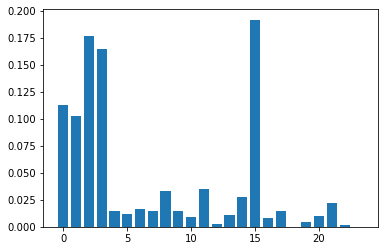

In [14]:
# 得到变量重要性排名
importance = classifier.feature_importances_
    
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

通过变量重要性的柱状图可见，第0、1、2、3、15个自变量对因变量的影响较大。可以考虑做特征选择，进一步提升模型性能。特征选择在后面的章节会讲到。

## 4.2 模型2：构建随机森林模型

In [15]:
# 模型2：构建随机森林模型（max_depth=3, max_features='auto', min_samples_leaf=50, n_estimators=100）
classifier = RandomForestClassifier(max_depth=3, max_features='auto', min_samples_leaf=50, n_estimators=100, random_state = 1)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=50, random_state=1)

In [16]:
# 在测试集做预测
y_pred = classifier.predict(x_test)

In [17]:
# 评估模型性能
print(accuracy_score(y_test, y_pred)) # 0.705
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.705
[[  0  59]
 [  0 141]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.70      1.00      0.83       141

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



D:\ProgramFiles\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


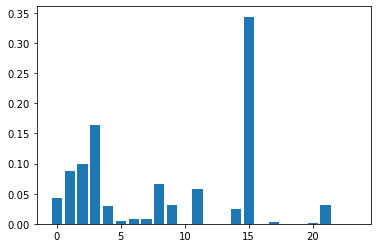

In [18]:
# 得到变量重要性排名
importance = classifier.feature_importances_
    
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## 4.3 模型3：构建随机森林模型

In [19]:
# 模型3：构建随机森林模型（max_depth=9, max_features=15, min_samples_leaf=5, n_estimators=25）
classifier = RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=5, n_estimators=25, random_state = 1)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_features=15, min_samples_leaf=5,
                       n_estimators=25, random_state=1)

In [20]:
# 在测试集做预测
y_pred = classifier.predict(x_test)

In [21]:
# 评估模型性能
print(accuracy_score(y_test, y_pred)) # 0.78
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.755
[[ 25  34]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.62      0.42      0.51        59
           1       0.79      0.89      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.66      0.67       200
weighted avg       0.74      0.76      0.74       200



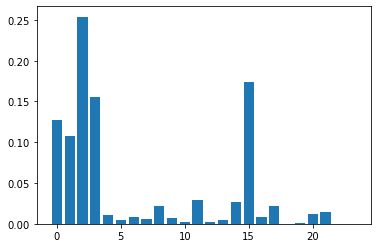

In [22]:
# 得到变量重要性排名
importance = classifier.feature_importances_
    
import matplotlib.pyplot as plt
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### 结论：
由上面3个模型可见，不同超参数对模型性能的影响不同